<span style="font-size:3em; text-align:center">Information System Security -</span>

<span style="font-size:3em; text-align:center">Anomaly-based Intrusion Detection System</span>

Data is contained in 8 different CSV files, each containing different attack data at different times. So first thing we must do is merge all the data from files into one pandas DataFrame.

In [1]:
import pandas as pd
import glob

In [2]:
# Saving all .csv files in folder to list.
path = "/home/rutwikk/NetworkML/CSVdata/MachineLearningCVE/"
files = [file for file in glob.glob(path + "**/*.csv", recursive=True)]

In [3]:
[print(f) for f in files]

/home/rutwikk/NetworkML/CSVdata/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
/home/rutwikk/NetworkML/CSVdata/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
/home/rutwikk/NetworkML/CSVdata/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
/home/rutwikk/NetworkML/CSVdata/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
/home/rutwikk/NetworkML/CSVdata/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv
/home/rutwikk/NetworkML/CSVdata/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv
/home/rutwikk/NetworkML/CSVdata/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv
/home/rutwikk/NetworkML/CSVdata/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv


[None, None, None, None, None, None, None, None]

In [4]:
# Reading all the csv files into dataframes and putting thoose DFs to one list.

dataset = [pd.read_csv(f) for f in files]

In [5]:
# Here we can see the number of rows and columns for each table.

for d in dataset:
    print(d.shape)

(170366, 79)
(288602, 79)
(286467, 79)
(225745, 79)
(692703, 79)
(445909, 79)
(529918, 79)
(191033, 79)


In [6]:
# We already established that all tables have the same number of columns, but are they the same columns?
# This next piece of code loops over all given tables and compares each of them to all others.

for i in range(0,len(dataset)):
    if i != len(dataset)-1:
        same_columns = dataset[i].columns == dataset[i+1].columns
        
        if False in same_columns:
            print(i)
            break

same_columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [7]:
# Combining all tables into one dataset. This is possilbe since all tables have the same columns,
# as we checked in the cell above.

dataset = pd.concat([d for d in dataset]).drop_duplicates(keep=False)
dataset.reset_index(drop=True, inplace = True)

In [8]:
# By checking the shape of dataset we can confirm that concatenation has been successfull.

dataset.shape

(2427193, 79)

# Preliminary data analysis

Some general info about the dataset. It contains roughly 2.5 million records across 79 columns. Data consists of mostly int64 and float64 types, except 3 attributes of 'object' type. 

Dataset contains of network traffic data during different attacks, represented with values like: port numbers, IP adressses, packet lenghts, SYN/ACK/FIN/.. flag counts, packet size and other...

In [9]:
#dataset = pd.read_csv('Dataset_clean.csv', index_col=[0])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2427193 entries, 0 to 2427192
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max         

In [10]:
dataset.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,...,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06
mean,8.887218e+03,1.722299e+07,1.061457e+01,1.197127e+01,6.337711e+02,1.884117e+04,2.393483e+02,1.916761e+01,6.516700e+01,8.029052e+01,...,6.218988e+00,-3.202190e+03,9.511021e+04,4.797316e+04,1.786510e+05,6.798820e+04,9.696673e+06,5.876141e+05,1.013952e+07,9.234826e+06
std,1.925879e+04,3.574909e+07,8.095918e+02,1.077107e+03,1.078985e+04,2.443980e+06,7.696329e+02,6.151622e+01,1.989624e+02,3.021573e+02,...,6.872956e+02,1.171719e+06,6.995254e+05,4.244406e+05,1.105770e+06,6.226939e+05,2.525299e+07,4.965976e+06,2.603281e+07,2.498687e+07
min,0.000000e+00,-1.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.300000e+01,2.350000e+02,2.000000e+00,1.000000e+00,2.400000e+01,6.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.000000e+01,6.049300e+04,2.000000e+00,2.000000e+00,6.800000e+01,1.620000e+02,4.100000e+01,2.000000e+00,3.700000e+01,0.000000e+00,...,1.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.430000e+02,5.558409e+06,6.000000e+00,5.000000e+00,3.470000e+02,1.592000e+03,2.280000e+02,3.700000e+01,5.300000e+01,7.868654e+01,...,3.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553500e+04,1.200000e+08,2.197590e+05,2.919220e+05,1.290000e+07,6.554530e+08,2.482000e+04,2.325000e+03,5.940857e+03,7.125597e+03,...,2.135570e+05,1.380000e+02,1.100000e+08,7.420000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08


Upon further inspection we can see that dataset contains 15 labels. Labels represent network/web attacks and BENIGN state which is the network traffic during normal business day. 

In [11]:
# Dataset conatains 15 labels.
#print(dataset[' Label'].unique())
#len(dataset[' Label'].unique())

print(dataset[' Label'].unique())
len(dataset[' Label'].unique())

['BENIGN' 'Web Attack � Brute Force' 'Web Attack � XSS'
 'Web Attack � Sql Injection' 'Infiltration' 'PortScan' 'DDoS'
 'DoS slowloris' 'DoS Slowhttptest' 'DoS Hulk' 'DoS GoldenEye'
 'Heartbleed' 'FTP-Patator' 'SSH-Patator' 'Bot']


15

In [12]:
dataset.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,389,113095465,48,24,9668,10012,403,0,201.416667,203.548293,...,32,203985.500,5.758373e+05,1629110,379,13800000.0,4.277541e+06,16500000,6737603,BENIGN
1,389,113473706,68,40,11364,12718,403,0,167.117647,171.919413,...,32,178326.875,5.034269e+05,1424245,325,13800000.0,4.229413e+06,16500000,6945512,BENIGN
2,0,119945515,150,0,0,0,0,0,0.000000,0.000000,...,0,6909777.333,1.170000e+07,20400000,6,24400000.0,2.430000e+07,60100000,5702188,BENIGN
3,443,60261928,9,7,2330,4221,1093,0,258.888889,409.702161,...,20,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,53,269,2,2,102,322,51,51,51.000000,0.000000,...,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


In [13]:
!pip install seaborn

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

Most records in the dataset are of DDos and DOS Hulk attacks. This might pose a problem later in model training, considering that there is a very small amount of data for most attacks. Model selection will be greatly influenced by this information.

In [15]:
data = dataset[' Label'].where(dataset[' Label'] != "BENIGN")

/home/rutwikk/anaconda3/envs/gensim/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Web Attack � Brute Force'),
  Text(1, 0, 'Web Attack � XSS'),
  Text(2, 0, 'Web Attack � Sql Injection'),
  Text(3, 0, 'Infiltration'),
  Text(4, 0, 'PortScan'),
  Text(5, 0, 'DDoS'),
  Text(6, 0, 'DoS slowloris'),
  Text(7, 0, 'DoS Slowhttptest'),
  Text(8, 0, 'DoS Hulk'),
  Text(9, 0, 'DoS GoldenEye'),
  Text(10, 0, 'Heartbleed'),
  Text(11, 0, 'FTP-Patator'),
  Text(12, 0, 'SSH-Patator'),
  Text(13, 0, 'Bot')])

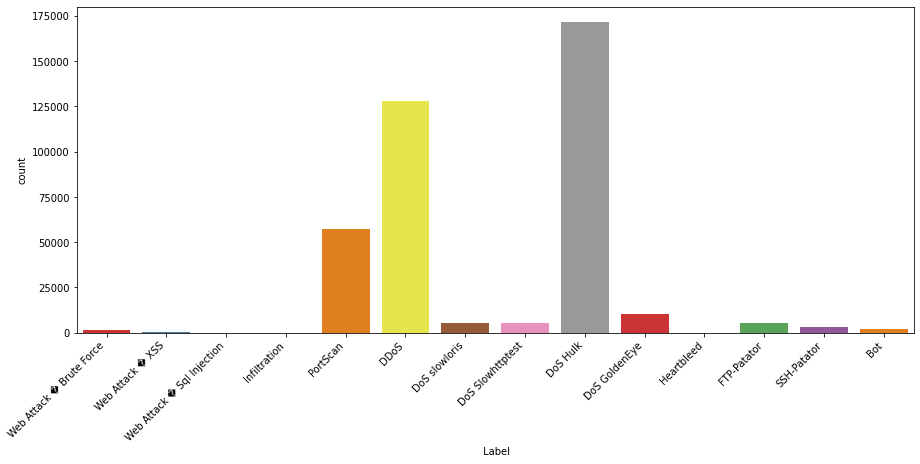

In [16]:
plt.figure(figsize=(15,6))
chart = sns.countplot(data, palette="Set1")
plt.xticks(rotation=45, horizontalalignment="right")

# Data Cleaning

This chapter contains data cleaning code. We go through the process of renaming columns, removing NaN and non-finite values (-inf, inf) to get the data ready for visualization and model training.

## Renaming columns

In [17]:
# Removing whitespaces in column names.

col_names = [col.replace(' ', '') for col in dataset.columns]
dataset.columns = col_names
dataset.head()

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label
0,389,113095465,48,24,9668,10012,403,0,201.416667,203.548293,...,32,203985.500,5.758373e+05,1629110,379,13800000.0,4.277541e+06,16500000,6737603,BENIGN
1,389,113473706,68,40,11364,12718,403,0,167.117647,171.919413,...,32,178326.875,5.034269e+05,1424245,325,13800000.0,4.229413e+06,16500000,6945512,BENIGN
2,0,119945515,150,0,0,0,0,0,0.000000,0.000000,...,0,6909777.333,1.170000e+07,20400000,6,24400000.0,2.430000e+07,60100000,5702188,BENIGN
3,443,60261928,9,7,2330,4221,1093,0,258.888889,409.702161,...,20,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,53,269,2,2,102,322,51,51,51.000000,0.000000,...,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


In [18]:
# Here we can see that 'Label' column contains some wierd characters. 

dataset["Label"].unique()

array(['BENIGN', 'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection', 'Infiltration', 'PortScan', 'DDoS',
       'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye',
       'Heartbleed', 'FTP-Patator', 'SSH-Patator', 'Bot'], dtype=object)

In [19]:
# This next snippet uses regular expressions to replace wierd characters with dunders.

label_names = dataset['Label'].unique()


import re

label_names = [re.sub("[^a-zA-Z ]+", "", l) for l in label_names]
label_names = [re.sub("[\s\s]", '_', l) for l in label_names]
label_names = [lab.replace("__", "_") for lab in label_names]

label_names, len(label_names)

(['BENIGN',
  'Web_Attack_Brute_Force',
  'Web_Attack_XSS',
  'Web_Attack_Sql_Injection',
  'Infiltration',
  'PortScan',
  'DDoS',
  'DoS_slowloris',
  'DoS_Slowhttptest',
  'DoS_Hulk',
  'DoS_GoldenEye',
  'Heartbleed',
  'FTPPatator',
  'SSHPatator',
  'Bot'],
 15)

In [20]:
# Replacing 'Label' column values with new readable values.

labels = dataset['Label'].unique()

for i in range(0,len(label_names)):
    dataset['Label'] = dataset['Label'].replace({labels[i] : label_names[i]})
    
dataset['Label'].unique()

array(['BENIGN', 'Web_Attack_Brute_Force', 'Web_Attack_XSS',
       'Web_Attack_Sql_Injection', 'Infiltration', 'PortScan', 'DDoS',
       'DoS_slowloris', 'DoS_Slowhttptest', 'DoS_Hulk', 'DoS_GoldenEye',
       'Heartbleed', 'FTPPatator', 'SSHPatator', 'Bot'], dtype=object)

In [21]:
len(dataset['Label'].unique())

15

In [22]:
# Saving cleaned dataset.

#dataset.to_csv("Dataset_clean.csv", index=False)

## Removing NULL values

In [23]:
#dataset = pd.read_csv("Dataset_clean.csv", index_col=0)
dataset.head()

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label
0,389,113095465,48,24,9668,10012,403,0,201.416667,203.548293,...,32,203985.500,5.758373e+05,1629110,379,13800000.0,4.277541e+06,16500000,6737603,BENIGN
1,389,113473706,68,40,11364,12718,403,0,167.117647,171.919413,...,32,178326.875,5.034269e+05,1424245,325,13800000.0,4.229413e+06,16500000,6945512,BENIGN
2,0,119945515,150,0,0,0,0,0,0.000000,0.000000,...,0,6909777.333,1.170000e+07,20400000,6,24400000.0,2.430000e+07,60100000,5702188,BENIGN
3,443,60261928,9,7,2330,4221,1093,0,258.888889,409.702161,...,20,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,53,269,2,2,102,322,51,51,51.000000,0.000000,...,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


In [24]:
# Checking if there are any NULL values in the dataset.

dataset.isnull().values.any()

True

In [25]:
# Checking which column/s contain NULL values.

[col for col in dataset if dataset[col].isnull().values.any()]

['FlowBytes/s']

In [26]:
# Checking how many NULL values it this column contains.

dataset['FlowBytes/s'].isnull().sum()

334

In [27]:
# Considering that only 334 rows contain NULL vlaues in the entire dataset, which makes about 0.01%, we
# can safely remove all NULL rows without spoiling the data.

334/dataset.shape[0]*100

0.013760751617197316

In [28]:
# Removing rows that contain NULL values and checking if number of removed rows is equal to the number of null values.

before = dataset.shape

dataset.dropna(inplace=True)

after = dataset.shape

before[0] - after[0]

334

In [29]:
dataset.isnull().any().any()

False

## Removing *non-finite* values

In [30]:
import numpy as np

In [31]:
labl = dataset['Label']
dataset = dataset.loc[:, dataset.columns != 'Label'].astype('float64')

In [32]:
# Checking if all values are finite.

np.all(np.isfinite(dataset))

False

In [33]:
# Checking what column/s contain non-finite values.

nonfinite = [col for col in dataset if not np.all(np.isfinite(dataset[col]))]

nonfinite

['FlowBytes/s', 'FlowPackets/s']

In [34]:
# Checking how many non-finite values each column contains.

finite = np.isfinite(dataset['FlowBytes/s']).sum()

dataset.shape[0] - finite

1132

In [35]:
# Checking how many non-finite values each column contains.

finite = np.isfinite(dataset['FlowPackets/s']).sum()

dataset.shape[0] - finite

1132

In [36]:
# Same as before, since there is a small number of non-finite values we can safely remove them from the dataset
# without spoiling the dataset.

# Replacing infinite values with NaN values.
dataset = dataset.replace([np.inf, -np.inf], np.nan)

In [37]:
# We can see that now we have Nan values again.

np.any(np.isnan(dataset))

True

In [38]:
# Bringing the Labels back into the dataset before deliting Nan rows.

dataset = dataset.merge(labl, how='outer', left_index=True, right_index=True)

In [39]:
# Removing new NaN values.

dataset.dropna(inplace=True)

In [40]:
dataset.shape

(2425727, 79)

In [41]:
dataset.head()

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label
0,389.0,113095465.0,48.0,24.0,9668.0,10012.0,403.0,0.0,201.416667,203.548293,...,32.0,203985.500,5.758373e+05,1629110.0,379.0,13800000.0,4.277541e+06,16500000.0,6737603.0,BENIGN
1,389.0,113473706.0,68.0,40.0,11364.0,12718.0,403.0,0.0,167.117647,171.919413,...,32.0,178326.875,5.034269e+05,1424245.0,325.0,13800000.0,4.229413e+06,16500000.0,6945512.0,BENIGN
2,0.0,119945515.0,150.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,6909777.333,1.170000e+07,20400000.0,6.0,24400000.0,2.430000e+07,60100000.0,5702188.0,BENIGN
3,443.0,60261928.0,9.0,7.0,2330.0,4221.0,1093.0,0.0,258.888889,409.702161,...,20.0,0.000,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,BENIGN
4,53.0,269.0,2.0,2.0,102.0,322.0,51.0,51.0,51.000000,0.000000,...,32.0,0.000,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,BENIGN


In [42]:
# Saving cleaned dataset.

#dataset.to_csv("Dataset_clean_dropna.csv", index=False)

# Data visualization

So, by now we know our dataset has 78 features and is split into 15 categories (14 attacks and 1 "normal" state).
Next step is to try and visualize what the dataset looks like in feature space.
For this we will use principal component analysis (PCA) to reduce dimensionality and then pass the reduced dataset to t-SNE (t - Distributed Stohastic Neighbor Entities) for visual representation in 2D space.

In [43]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline

In [44]:
# We are going to pick 10.000 random rows from the dataset for visualization purposes.
# Setting the random seed for reproducability of results.

np.random.seed(42)

rand_perm = np.random.permutation(dataset.shape[0])

In [45]:
feature_cols = dataset.columns[:-1]
dataset1 = dataset.reset_index(drop=True)
dataset_subset = dataset1.loc[rand_perm[:10000],:]

In [46]:
dataset_subset = dataset_subset.replace([np.inf, -np.inf], np.nan)
dataset_subset.dropna(inplace=True)

In [47]:
data_subset = dataset_subset[feature_cols].values

In [48]:
# Performing the principal component analysis. With just 19 components the variance ratio remains 99%, which is great.

pca = PCA(n_components=19)
pca_res = pca.fit_transform(data_subset)

#data_subset = None
np.sum(pca.explained_variance_ratio_)

0.9999305863197004

In [49]:
data_subset.shape

(10000, 78)

In [50]:
# Computing t-SNE.

tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=1000)
tsne_res = tsne.fit_transform(data_subset)
print("done")

/home/rutwikk/anaconda3/envs/gensim/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/rutwikk/anaconda3/envs/gensim/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


done


In [51]:
dataset_subset['tsne_firstD'] = tsne_res[:,0]
dataset_subset['tsne_secondD'] = tsne_res[:,1]

<AxesSubplot:xlabel='tsne_firstD', ylabel='tsne_secondD'>

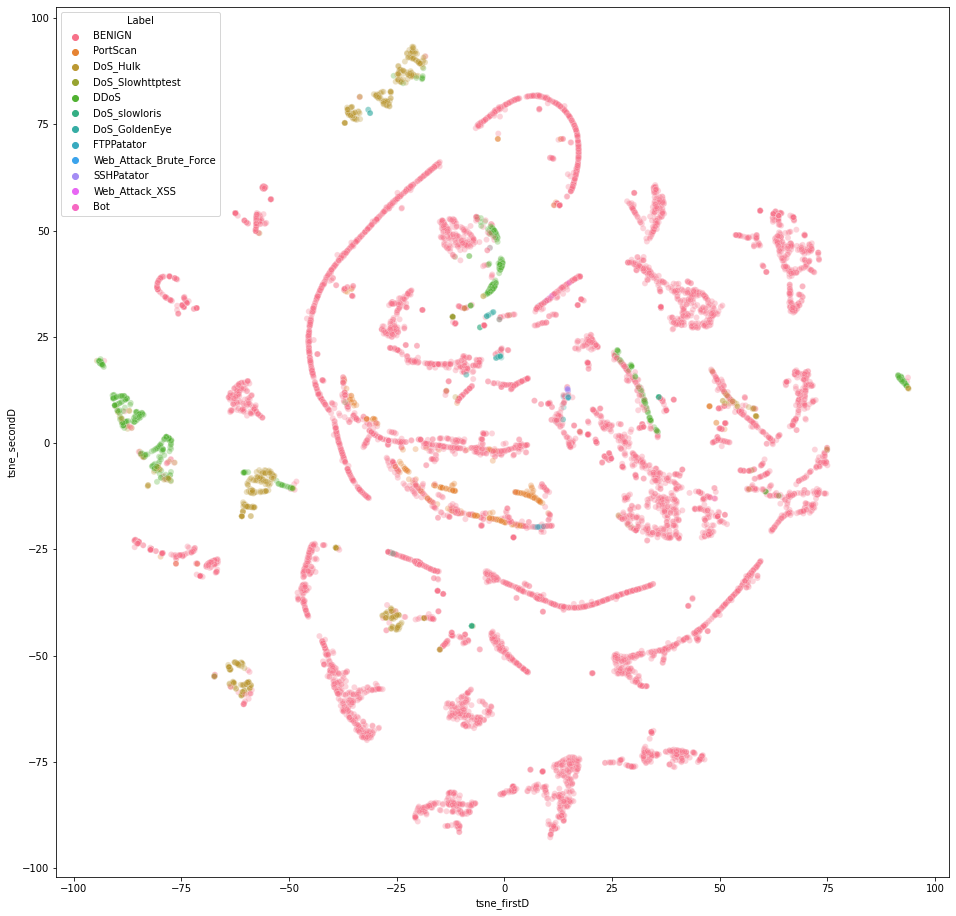

In [52]:
plt.figure(figsize=(16,16))

sns.scatterplot(
    x="tsne_firstD", y="tsne_secondD",
    data=dataset_subset,
    hue="Label",
    legend="full",
    alpha=0.3
)

From the cell above we can see distribution of the data in 2D space. It is obvious that attacks are not spatialy well separated from normal state. Clusters of attacks can hardly be seen, instead they are found in the same place as the "normal state" datatpoints.

This insight leads us to conclude that the ML model will probably have some issues with this kind of data. ML model will have to be chosen with this in mind.

# Data preparation

In this chapter, final data preparation steps are taken before we use the data for model traning and testing.

These steps include:

* Data scaling
* Label encoding
* Data splitting

In [53]:
#dataset = pd.read_csv("Dataset_clean_dropna.csv")

## Scaling the data

The next few cells contain the code for scaling the data into the size adequate for the ML algorithm. 

In [54]:
# Splitting dataset into features and labels.

labels = dataset['Label']
features = dataset.loc[:, dataset.columns != 'Label'].astype('float64')

In [55]:
features.head()

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,act_data_pkt_fwd,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin
0,389.0,113095465.0,48.0,24.0,9668.0,10012.0,403.0,0.0,201.416667,203.548293,...,23.0,32.0,203985.500,5.758373e+05,1629110.0,379.0,13800000.0,4.277541e+06,16500000.0,6737603.0
1,389.0,113473706.0,68.0,40.0,11364.0,12718.0,403.0,0.0,167.117647,171.919413,...,39.0,32.0,178326.875,5.034269e+05,1424245.0,325.0,13800000.0,4.229413e+06,16500000.0,6945512.0
2,0.0,119945515.0,150.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,6909777.333,1.170000e+07,20400000.0,6.0,24400000.0,2.430000e+07,60100000.0,5702188.0
3,443.0,60261928.0,9.0,7.0,2330.0,4221.0,1093.0,0.0,258.888889,409.702161,...,8.0,20.0,0.000,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0
4,53.0,269.0,2.0,2.0,102.0,322.0,51.0,51.0,51.000000,0.000000,...,1.0,32.0,0.000,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0


In [56]:
# For scaling the data, we use RobustScaler class from sklearn.

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

For scaling the data we used RobustScaler class from sklearn. RobustScaler is used to perserve outliers in the data.

In [57]:
scaler = RobustScaler()
scaler.fit(features)

features = scaler.transform(features)

In [58]:
# Checking if scaling has been succesful.
features[0]

array([ 7.92307692e-01,  2.03226595e+01,  1.15000000e+01,  5.50000000e+00,
        2.97213622e+01,  6.19496855e+00,  1.63063063e+00, -5.40540541e-02,
        3.49822695e+00,  2.58682484e+00,  9.06284454e-01,  3.80722892e+00,
        1.41671402e+00,  6.59905994e-01, -4.85969514e-02, -4.27446427e-03,
        2.38393139e+00,  2.75217840e+00,  3.17620976e+00, -1.47058824e-02,
        2.15103286e+01,  2.86275974e+00,  4.84714728e+00,  3.32727485e+00,
        0.00000000e+00,  6.62212828e+02,  1.47718127e+02,  1.93975824e+02,
        1.22998457e+02,  0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.31428571e+01,  6.50000000e+00,
       -3.87243115e-03, -8.85852095e-02, -5.40540541e-02,  5.81403634e-01,
        1.29674896e+00,  5.47712141e-01,  3.95577880e-01,  0.00000000e+00,
        1.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -1.00000000e+00,
        1.09622718e+00,  

## Label encoding

Label encoding is done when dataset contains categorical values (ex. 0-5, A/B/C, 55+). It is used to turn categorical values into numerical values by replacing data categories with integers starting with 0.

In [59]:
# No need to do previous operations, just load clean saved dataset.

#dataset = pd.read_csv('Dataset_clean.csv', index_col=[0])

In [60]:
from sklearn.preprocessing import LabelEncoder

'Lables' column contains categorical values - 15 of them (14 types of attacks in our dataset +  1 normal state).

To convert this into numerical values we will use 'LabelEncoder' class from sklearn.

In [61]:
LE = LabelEncoder()

LE.fit(labels)
labels = LE.transform(labels)

In [62]:
# Labels have been replaced with integers.

np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [63]:
# Checking that encoding reversal works.

d = LE.inverse_transform(labels)
d = pd.Series(d)
d.unique()

array(['BENIGN', 'Web_Attack_Brute_Force', 'Web_Attack_XSS',
       'Web_Attack_Sql_Injection', 'Infiltration', 'PortScan', 'DDoS',
       'DoS_slowloris', 'DoS_Slowhttptest', 'DoS_Hulk', 'DoS_GoldenEye',
       'Heartbleed', 'FTPPatator', 'SSHPatator', 'Bot'], dtype=object)

## Splitting the data

Final step to data preparation is splitting the data into traning and testing sets. For this there already exists _sklearn_ function that does all the splitting for us. This step is important so we can have representative data for evaluating our model. Both train and test samples should contain similar data variance.

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
# The next step is to split training and testing data. For this we will use sklearn function train_test_split().

features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=.3)

features_train.shape, features_test.shape, labels_train.shape, labels_test.shape

((1698008, 78), (727719, 78), (1698008,), (727719,))

In [66]:
# # Clearing variables.

# dataset = None
# finite = None
# labl = None
# d = None
# features = None
# labels = None

# Model training

For completing this task we chose to use a neural network. Specifically, the multi-layer perceptron, more specifically, feedforward neural network multi-class classifier with backpropagating algorithm. NN will be used to classifiy 14 different attacks and 1 normal state, as we saw from the labels in previous chapters.

In this chapter we go by explaning parts of the network and its hyperparameters.

In [67]:
#SVM classifier

from sklearn import svm, metrics
svm_clf = svm.SVC(gamma='auto', max_iter=10, probability=True)
svm_clf.fit(features_train, labels_train)
predicted = svm_clf.predict(features_test)
print(
    f"Classification report for classifier {svm_clf}:\n"
    f"{metrics.classification_report(labels_test, predicted)}\n"
)

/home/rutwikk/anaconda3/envs/gensim/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/home/rutwikk/anaconda3/envs/gensim/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rutwikk/anaconda3/envs/gensim/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rutwikk/anaconda3/envs/gensim/lib/python3.7/site-packages/sklearn/metrics/_clas

Classification report for classifier SVC(gamma='auto', max_iter=10, probability=True):
              precision    recall  f1-score   support

           0       0.82      0.82      0.82    610738
           1       0.00      0.00      0.00       568
           2       0.27      0.02      0.03     38431
           3       0.00      0.00      0.00      3049
           4       0.02      0.05      0.03     51311
           5       0.97      0.05      0.09      1531
           6       0.00      0.00      0.00      1571
           7       0.01      0.00      0.01      1614
           9       0.00      0.00      0.00         8
          10       0.00      0.00      0.00     17267
          11       0.00      0.00      0.00       951
          12       1.00      0.00      0.01       471
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00       206

    accuracy                           0.69    727719
   macro avg       0.22      0.07      0.07    

In [68]:
metrics.accuracy_score(labels_test,predicted)

0.6945263212861008

In [ ]:
#RF classifier

from sklearn.ensemble import RandomForestRegressor
rf_clf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf_clf.fit(features_train, labels_train)
predictions = rf_clf.predict(features_test)

# Calculate the absolute errors
errors = abs(predictions - labels_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

In [69]:
#AdaBoost classifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

ada_clf = AdaBoostClassifier(n_estimators=100, random_state=0)
ada_clf.fit(features_train, labels_train)
ada_clf.predict(features_test)
ada_clf.score(features_test, labels_test)

0.9014976934778397

In [70]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
logreg_clf = LogisticRegression()
logreg_clf.fit(features_train, labels_train)
predictions = logreg_clf.predict(features_test)
score = logreg_clf.score(features_test, labels_test)
print(score)

/home/rutwikk/anaconda3/envs/gensim/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.7993167692474705


In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
eclf1 = VotingClassifier(estimators=[('svm', svm_clf), ('lr', logreg_clf), ('adb', ada_clf)], voting='hard')
eclf1 = eclf1.fit(features_train, labels_train)
predictions = eclf1.predict(features_test)

In [ ]:
acc_score = eclf1.score(features_test, labels_test)

In [ ]:
print(acc_score)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
eclf2 = VotingClassifier(estimators=[('svm', svm_clf), ('lr', logreg_clf), ('adb', ada_clf)], voting='soft')
eclf2 = eclf1.fit(features_train, labels_train)
predictions = eclf1.predict(features_test)
acc_score = eclf2.score(features_test, labels_test)

In [ ]:
print(acc_score)

Feature: 0, Score: 0.06453
Feature: 1, Score: 0.00114
Feature: 2, Score: 0.00014
Feature: 3, Score: 0.00045
Feature: 4, Score: 0.00102
Feature: 5, Score: 0.00026
Feature: 6, Score: 0.00305
Feature: 7, Score: 0.00005
Feature: 8, Score: 0.00005
Feature: 9, Score: 0.02348
Feature: 10, Score: 0.00094
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00011
Feature: 13, Score: 0.19698
Feature: 14, Score: 0.22064
Feature: 15, Score: 0.00033
Feature: 16, Score: 0.00089
Feature: 17, Score: 0.22303
Feature: 18, Score: 0.00062
Feature: 19, Score: 0.00171
Feature: 20, Score: 0.00200
Feature: 21, Score: 0.00008
Feature: 22, Score: 0.00008
Feature: 23, Score: 0.00009
Feature: 24, Score: 0.01148
Feature: 25, Score: 0.00021
Feature: 26, Score: 0.02981
Feature: 27, Score: 0.00228
Feature: 28, Score: 0.00043
Feature: 29, Score: 0.00162
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00044
Feature: 35, Score: 0.00001
Fe

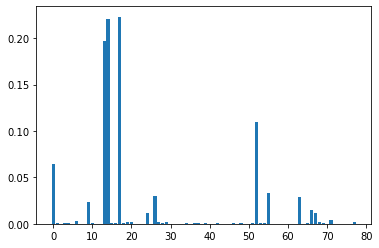

In [72]:
#Decision Tree Feature Importance

# fit the model
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
dtree = DecisionTreeRegressor()
dtree.fit(features_train, labels_train)
# get importance
importance = dtree.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %s, Score: %.5f' % (features_train[i],v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [99]:
column_labels = (list(dataset.columns.values))
feature_importance_dict = dict()

In [120]:
for i,v in enumerate(importance):
    if v >= 0.01:
        feature_importance_dict[column_labels[i]] = v
        print('Feature: %s, Score: %.5f' % (column_labels[i],v))

Feature: DestinationPort, Score: 0.06453
Feature: FwdPacketLengthStd, Score: 0.02348
Feature: BwdPacketLengthStd, Score: 0.19698
Feature: FlowBytes/s, Score: 0.22064
Feature: FlowIATStd, Score: 0.22303
Feature: FwdIATMin, Score: 0.01148
Feature: BwdIATMean, Score: 0.02981
Feature: AveragePacketSize, Score: 0.10919
Feature: FwdHeaderLength.1, Score: 0.03319
Feature: SubflowFwdBytes, Score: 0.02866
Feature: Init_Win_bytes_forward, Score: 0.01436
Feature: Init_Win_bytes_backward, Score: 0.01110


In [121]:
print(feature_importance_dict)

{'DestinationPort': 0.06452718780132577, 'FwdPacketLengthStd': 0.023479512124658385, 'BwdPacketLengthStd': 0.19697800506194513, 'FlowBytes/s': 0.22064004597373574, 'FlowIATStd': 0.22303147826342293, 'FwdIATMin': 0.011484810956185533, 'BwdIATMean': 0.029813582735237543, 'AveragePacketSize': 0.10919327932245003, 'FwdHeaderLength.1': 0.033188788017559076, 'SubflowFwdBytes': 0.02866317464233232, 'Init_Win_bytes_forward': 0.014355900986557639, 'Init_Win_bytes_backward': 0.011099293659721211}


In [122]:
sorted_dict = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
print(sorted_dict)

[('FlowIATStd', 0.22303147826342293), ('FlowBytes/s', 0.22064004597373574), ('BwdPacketLengthStd', 0.19697800506194513), ('AveragePacketSize', 0.10919327932245003), ('DestinationPort', 0.06452718780132577), ('FwdHeaderLength.1', 0.033188788017559076), ('BwdIATMean', 0.029813582735237543), ('SubflowFwdBytes', 0.02866317464233232), ('FwdPacketLengthStd', 0.023479512124658385), ('Init_Win_bytes_forward', 0.014355900986557639), ('FwdIATMin', 0.011484810956185533), ('Init_Win_bytes_backward', 0.011099293659721211)]


<BarContainer object of 12 artists>

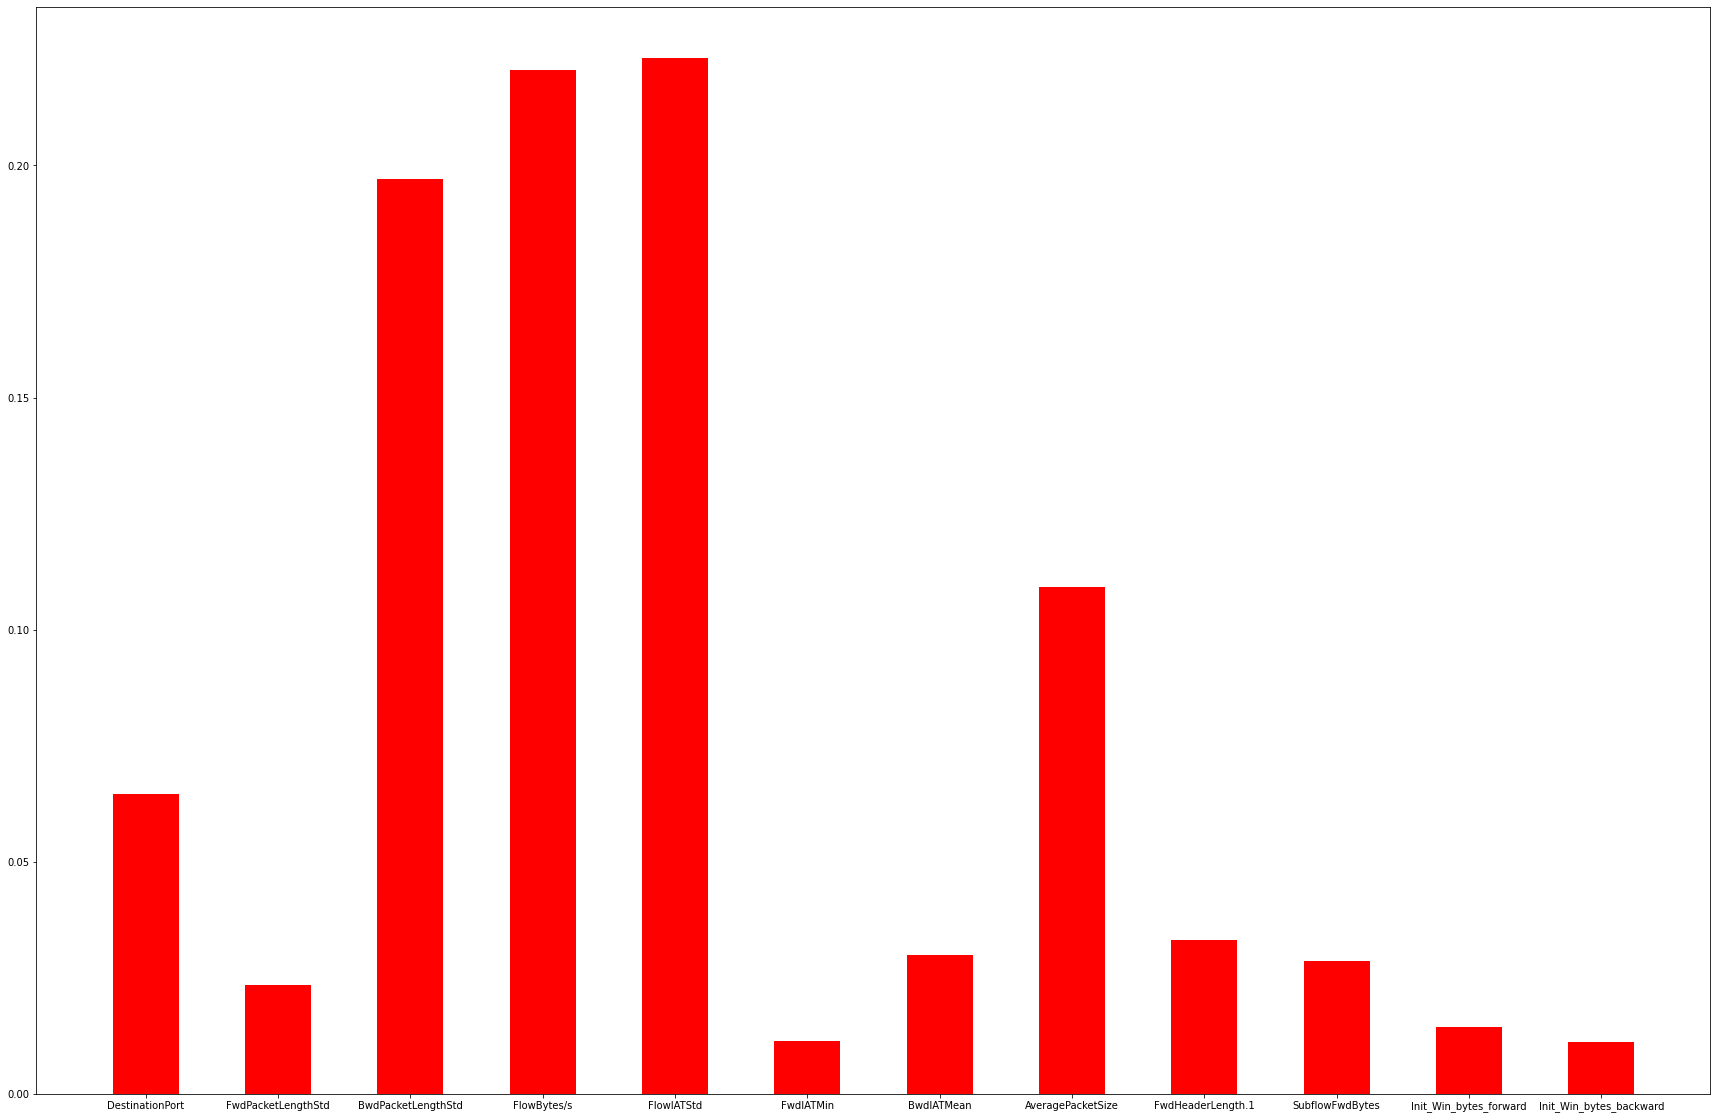

In [123]:
plt.subplots(figsize=(30,20))
plt.bar(feature_importance_dict.keys(), feature_importance_dict.values(), 0.5, color='r')

In [ ]:
#Saving Classifier Models
import pickle

with open('svm_model_simple_ml.pkl','wb') as f:
    pickle.dump(svm_clf,f)
    
# with open('rf_model.pkl','wb') as f:
#     pickle.dump(rf_clf,f)

with open('adb_model_simple_ml.pkl','wb') as f:
    pickle.dump(ada_clf,f)

with open('lr_model_simple_ml.pkl','wb') as f:
    pickle.dump(logreg_clf,f)
    
with open('hardvc_model_simple_ml.pkl','wb') as f:
    pickle.dump(eclf1,f)

with open('softvc_model_simple_ml.pkl','wb') as f:
    pickle.dump(eclf2,f)

with open('dtree_model_simple_ml.pkl','wb') as f:
    pickle.dump(dtree,f)

In [ ]:
import tensorflow as tf
import datetime

#%load_ext tensorboard

Our tensorflow Sequential model has 3 layers. Input, 1 hidden and an output layer.

* Input layer has 78 neurons, one for each feature.
* Hidden layer has 67 neurons, this number has been calculated by [formula](https://www.heatonresearch.com/2017/06/01/hidden-layers.html) 2/3 the number of input neurons + number of output neurons.
* Output layer has 15 neurons, one for each class we predict.

For activation functions, we used standard functions for multi-class classification tasks - ReLu for hidden layer and _softmax_ function for output layer.

Finally, we use Dropout parameter set to 0.2 for randomly shutting off 20% of neurons in each learning iteration. This technique is used for decreasing overfitting thereby incresing network accuracy.

In [ ]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Flatten(input_shape=(78,)),
    tf.keras.layers.Dense(67, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(15, activation='softmax')
])

For learning rate optimization we used Adam optimizer.
Loss function used is sparse categorical crossentropy, which is standard for multiclass classification problems.

In [ ]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
import os

In the next cell we setup training logs for tensorboard as well as some tensorboard callbacks.

* tensorboard - callback that logs training data.
* EarlyStopping - callback that monitors 'loss (function)' metric and if the loss function does not get better in tne hext 10 iterations, callback stops the training and resotres the network with best weights up untill that iteration.

In [ ]:
log_dir = os.path.join(
    "train_logs",
    datetime.datetime.now().strftime("%Y%m%d-%H%M%S"),
)

# TF callback that sets up TensorBoard with training logs.
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# TF callback that stops training when best value of validationi loss function is reached. It also
# restores weights from the best training iteration.
eary_stop_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

In [ ]:
model.fit(features_train,
          labels_train,
          epochs=20,
          callbacks=[tensorboard_callback, eary_stop_callback])

We can see that training stoped after 18 out of 100 epochs due to 'loss' function metric not changing much in the previous 10 epochs.

After training we evaluate model accuracy (next cell), and find that our model predicts attacks with **91.2% accuracy**.

In [ ]:
# Evaluating model accuracy.
model.evaluate(features_test, labels_test, verbose=2)

In [ ]:
# Saving the model.

model.save('saved_models/IDS_model_' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + '.h5')

# Conclusion

In this project we made a neural network classifier that can predict 14 network/web attacks and normal traffic with 91% accuracy. This model is proof-of-concept that feedforward neural network with backpropagation algorithm can be used for classifying attacks in anomaly-based intrusion detection systems.


**Propositions**

We propose a couple of solutions for improving model accuracy as well as use of some other neural network architectures.

Accuracy of this model can probably be improved by _feature engineering_ and _feature selection_. Picking the features that have the most influence on the model.

Regarding this model, we propose tuning the model hyperparameters. Changing the hidden layer activation function, early stopping callback, dropout, optimizer and loss function should increase accuracy by some extent. Another way, albeit more complicated and resource intense is to use a genetic algorithm to evolve the best neural network arhitecture for this specific task.

Finally, we propose the usage of some other ML algorithms. Random forest classifiers have been used in intrusion detection system for a while now. Alternatively, we found some sources using autoencoders for anomaly detection.

In [69]:
!pip install shap

In [124]:
import pickle
with open('svm_model_simple_ml.pkl','wb') as f:
    pickle.dump(svm_clf,f)

In [137]:
import shap
shap.initjs()
explainer = shap.KernelExplainer(svm_clf.predict_proba, features_train[0:100])
shap_values = explainer.shap_values(features_test[0])
shap.force_plot(explainer.expected_value[0], shap_values[0], features_test[0])

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

In [145]:
!pip install xgboost

     |████████████████████████████████| 192.9 MB 49 kB/s s eta 0:00:01


In [ ]:
from xgboost import XGBClassifier
import shap

# train XGBoost model
model = XGBClassifier().fit(features_train, labels_train)

# compute SHAP values
explainer = shap.Explainer(model, features_train[1:20])
shap_values = explainer(features_train[1:20])
shap.plots.bar(shap_values)